# Model Training

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import tifffile as tiff

## Load training and label

In [3]:
# DATOS_train
datos_train = pd.read_csv("data/DATOS_train.csv")

In [5]:
path_feats = "data/train_features/content/train_features/"
path_labels = "data/train_labels/content/train_labels/"

In [7]:
feats = []
labels = []
for n in range(len(datos_train)):
    path_feat = datos_train.iloc[n].feature_image
    path_label = datos_train.iloc[n].label_image
    feat = tiff.imread(path_feats + path_feat)
    label = tiff.imread(path_labels + path_label)
    
    feats.append(feat)
    labels.append(label)
    
feats = np.array(feats)
labels = np.array(labels)

In [8]:
feats.shape, labels.shape

((5317, 128, 128, 10), (5317, 128, 128))

In [16]:
feats.min(), feats.max()

(-3.4028235e+38, 1.0)

In [17]:
labels.min(), labels.max()

(0, 15)

In [20]:
from collections import Counter
Counter(labels.flatten())

Counter({4: 32841983,
         2: 26621292,
         0: 6274714,
         6: 290550,
         1: 4317735,
         5: 6097122,
         7: 10616479,
         15: 53853})

## Definition to process label (separate per class)
Optional. We split each prediction into a 128 X 128 X 8 tensor. Each of the 8 layers correspond to classes 0, 1, 2, 4, 5, 6, 7, 15.

In [54]:
sample_label = labels[3]
sample_label.shape

(128, 128)

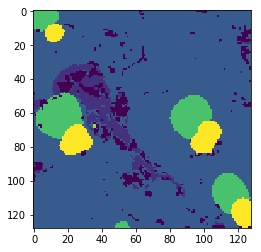

In [101]:
plt.imshow(sample_label)

In [108]:
new_array = []

for i in [0, 1, 2, 4, 5, 6, 7, 15]:
    print(i)
    layer = sample_label==i
    layer = layer.astype(int)
    new_array.append(layer)
new_array = np.array(new_array)
new_array.shape

0
1
2
4
5
6
7
15


(8, 128, 128)

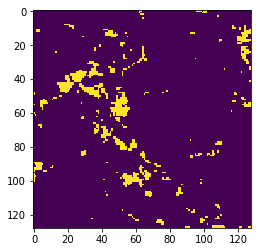

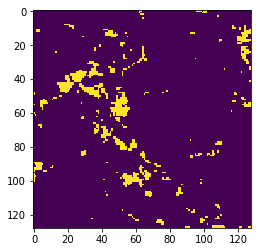

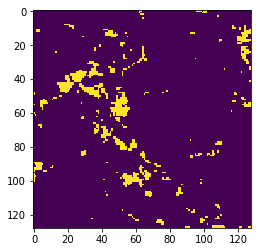

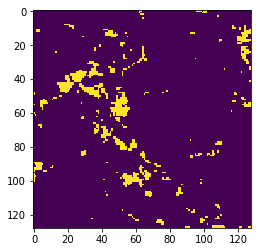

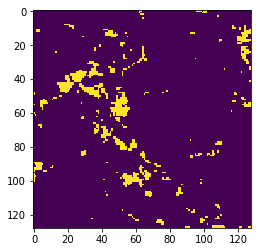

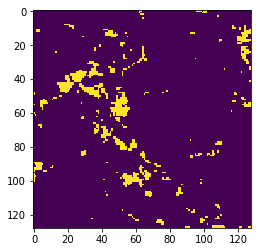

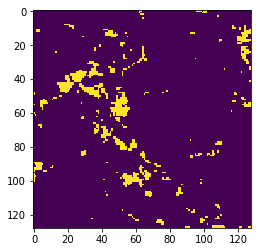

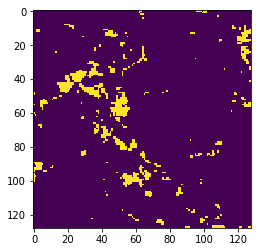

In [107]:
for i in range(8):
    plt.imshow(new_array[0])
    plt.show()

# Model Definitions

### Standard U-Net

### U-Net with Adversarial Loss on Prediction Network

### WGANs

## Training and Cross Validation

## Test Prediction

## Submission File